In [1]:
%load_ext autoreload 
%autoreload 2 

In [2]:
import random
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec # for subplots
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn.objects as so
import tensorflow as tf

from src.utilities.plot_helpers import generate_random_colors



2023-06-28 14:19:49.920116: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-28 14:19:49.970240: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-28 14:19:50.643640: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Experimental conditions: 
* 2 layer LSTM 
* trained with 32, 64, 96, or 128 units

#### Load Model

In [ ]:

path_to_experiment = '/projects/p31961/ENIGMA/results/models/experiments/stacked_lstm_experiment_01'
stacked_lstm_32_unit_path = os.path.join(path_to_experiment, 'StackedLSTM_32_units')
stacked_lstm_64_unit_path = os.path.join(path_to_experiment, 'StackedLSTM_64_units')
stacked_lstm_96_unit_path = os.path.join(path_to_experiment, 'StackedLSTM_96_units')
stacked_lstm_128_unit_path = os.path.join(path_to_experiment, 'StackedLSTM_128_units')

stacked_lstm_32_unit = tf.keras.models.load_model(stacked_lstm_32_unit_path)
stacked_lstm_64_unit = tf.keras.models.load_model(stacked_lstm_64_unit_path)
stacked_lstm_96_unit = tf.keras.models.load_model(stacked_lstm_96_unit_path)
stacked_lstm_128_unit = tf.keras.models.load_model(stacked_lstm_128_unit_path)

models = [stacked_lstm_32_unit, stacked_lstm_64_unit, stacked_lstm_96_unit, stacked_lstm_128_unit]

# Model Summary

In [4]:
for model in models:
    print(model.summary())

Model: "stacked_lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Lambda_1 (Lambda)           multiple                  0         
                                                                 
 LSTM_1 (LSTM)               multiple                  4352      
                                                                 
 LSTM_2 (LSTM)               multiple                  8320      
                                                                 
 Dense_output (Dense)        multiple                  33        
                                                                 
Total params: 12,705
Trainable params: 12,705


Non-trainable params: 0
_________________________________________________________________
None
Model: "stacked_lstm_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Lambda_1 (Lambda)           multiple                  0         
                                                                 
 LSTM_1 (LSTM)               multiple                  16896     
                                                                 
 LSTM_2 (LSTM)               multiple                  33024     
                                                                 
 Dense_output (Dense)        multiple                  65        
                                                                 
Total params: 49,985
Trainable params: 49,985
Non-trainable params: 0
_________________________________________________________________
None
Model: "stacked_lstm_2"
________________________________________________________

#### load training and testing data

In [6]:
dataset_dir = '/projects/p31961/gaby_data/aggregated_data/data_pipeline_downsampled/datasets'
X_train_path = os.path.join(dataset_dir, '5_day_training_gaby_downsampled_X_train.parquet.gzip')
X_test_path = os.path.join(dataset_dir, '5_day_training_gaby_downsampled_X_test.parquet.gzip')
y_train_path = os.path.join(dataset_dir, '5_day_training_gaby_downsampled_y_train.parquet.gzip')
y_test_path = os.path.join(dataset_dir, '5_day_training_gaby_downsampled_y_test.parquet.gzip')

X_train = pd.read_parquet(X_train_path)
X_test = pd.read_parquet(X_test_path)
y_train = pd.read_parquet(y_train_path)
y_test = pd.read_parquet(y_test_path)

In [7]:
unit_32_pred = stacked_lstm_32_unit.predict(X_test)
unit_64_pred = stacked_lstm_64_unit.predict(X_test)
unit_96_pred = stacked_lstm_96_unit.predict(X_test)
unit_128_pred = stacked_lstm_128_unit.predict(X_test)

2023-06-28 14:20:34.247034: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,8]
	 [[{{node inputs}}]]


    1/49576 [..............................] - ETA: 16:39:49

2023-06-28 14:20:35.234316: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
Could not load symbol cublasGetSmCountTarget from libcublas.so.11. Error: /home/mds8301/.conda/envs/enigma/lib/libcublas.so.11: undefined symbol: cublasGetSmCountTarget


49576/49576 [==============================] - 77s 2ms/step


2023-06-28 14:22:56.495422: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,8]
	 [[{{node inputs}}]]


49576/49576 [==============================] - 83s 2ms/step


2023-06-28 14:25:18.808689: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,8]
	 [[{{node inputs}}]]


49576/49576 [==============================] - 82s 2ms/step


2023-06-28 14:27:41.101712: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,8]
	 [[{{node inputs}}]]


49576/49576 [==============================] - 86s 2ms/step


# Full dataset

In [8]:
full_dataset = X_test.assign(unit_32_pred = unit_32_pred,
                             unit_64_pred = unit_64_pred,
                             unit_96_pred = unit_96_pred,
                             unit_128_pred = unit_128_pred,
                             true_signal = y_test['signal'])
full_dataset.head()


,day,time,trial,event_cue,event_shock,sensor_D1,sensor_D2,sensor_DA,unit_32_pred,unit_64_pred,unit_96_pred,unit_128_pred,true_signal
0,6,-25.000000,0,0,0,1,0,0,-0.001673,0.174586,0.214346,-0.005298,-0.047544
1,6,-24.901531,0,0,0,1,0,0,-0.002675,0.172767,0.215403,-0.006078,0.115965
2,6,-24.803064,0,0,0,1,0,0,-0.003774,0.170858,0.216183,-0.006944,-0.046369
3,6,-24.704596,0,0,0,1,0,0,-0.004650,0.168816,0.216720,-0.006081,-0.030047
4,6,-24.606127,0,0,0,1,0,0,-0.005693,0.166546,0.217095,-0.005471,0.461070


In [12]:
sensor_cols = ['sensor_DA', 'sensor_D1', 'sensor_D2']
event_cols = ['event_cue', 'event_shock']
signal_cols = ['unit_32_pred',
               'unit_64_pred',
               'unit_96_pred',
               'unit_128_pred',
               'true_signal']

def reshape_df(df):
    sensor_cols = ['sensor_DA', 'sensor_D1', 'sensor_D2']
    event_cols = ['event_cue', 'event_shock']
    signal_cols = ['unit_32_pred',
               'unit_64_pred',
               'unit_96_pred',
               'unit_128_pred',
               'true_signal']
    return (df
            # .drop(columns = ['trial'])
            .assign(sensor = lambda df_: df_[sensor_cols].idxmax(axis = 1).str.replace('sensor_', ''),
                   event = lambda df_: df_[event_cols].idxmax(axis = 1).str.replace('event_', ''))
            .melt(id_vars = ['day', 'time', 'trial', 'sensor', 'event'], 
                 value_vars = signal_cols, 
                 var_name = 'signal_type', 
                 value_name='z_score')
            .assign(signal_type = lambda df_: df_['signal_type'].str.replace('_signal', ''))
        #    .drop(columns = sensor_cols + event_cols)

           )   
reshaped_df = reshape_df(full_dataset)

In [ ]:
reshaped_df.head()

In [18]:


def plot_data(data, y_columns, colors,  day, event, sensor, ax):
    for column, color in zip(y_columns, colors):
        sns.lineplot(data = data, x = 'time', y = column, color = color, label = column, ax = ax, linewidth = 0.5)
    
    sns.despine()
    ax.set_ylim(-1.5, 1.5)
    ax.set_xlim(-25, 20)
    ax.set_title(f'Day: {day}, Event: {event}, Sensor: {sensor}')
    ax.set_ylabel('Z-score')
    ax.set_xlabel('Time (s)')
    legend = ax.legend(loc = "upper left", fontsize = 8, frameon = False)
    

# Remove the legend outline
    legend.get_frame().set_linewidth(0)
    


### queries

In [14]:

day_6_da_query = "day==6 & event_cue== 1 & sensor_DA==1 "
day_6_cue_DA_query_result = full_dataset.query(day_6_da_query).drop(columns = ['event_shock', 'sensor_D1', 'sensor_D2'])


day_7_da_query = "day==7 & event_cue== 1 & sensor_DA==1 "
day_7_cue_DA_query_result = full_dataset.query(day_7_da_query).drop(columns = ['event_shock', 'sensor_D1', 'sensor_D2'])

day_6_d1_query = "day==6 & event_cue== 1 & sensor_D1==1 "
day_6_d1_query_result = full_dataset.query(day_6_d1_query).drop(columns = ['event_shock', 'sensor_D1', 'sensor_D2'])

day_7_d1_query = "day==7 & event_cue== 1 & sensor_D1==1 "
day_7_d1_query_result = full_dataset.query(day_7_d1_query)

day_6_d2_query = "day==6 & event_cue== 1 & sensor_D2==1 "
day_6_d2_query_result = full_dataset.query(day_6_d2_query)

day_7_d2_query = "day==7 & event_cue== 1 & sensor_D2==1 "
day_7_d2_query_result = full_dataset.query(day_6_d2_query)


# Results for day 6 and day 7 with cue and shock for each sensor

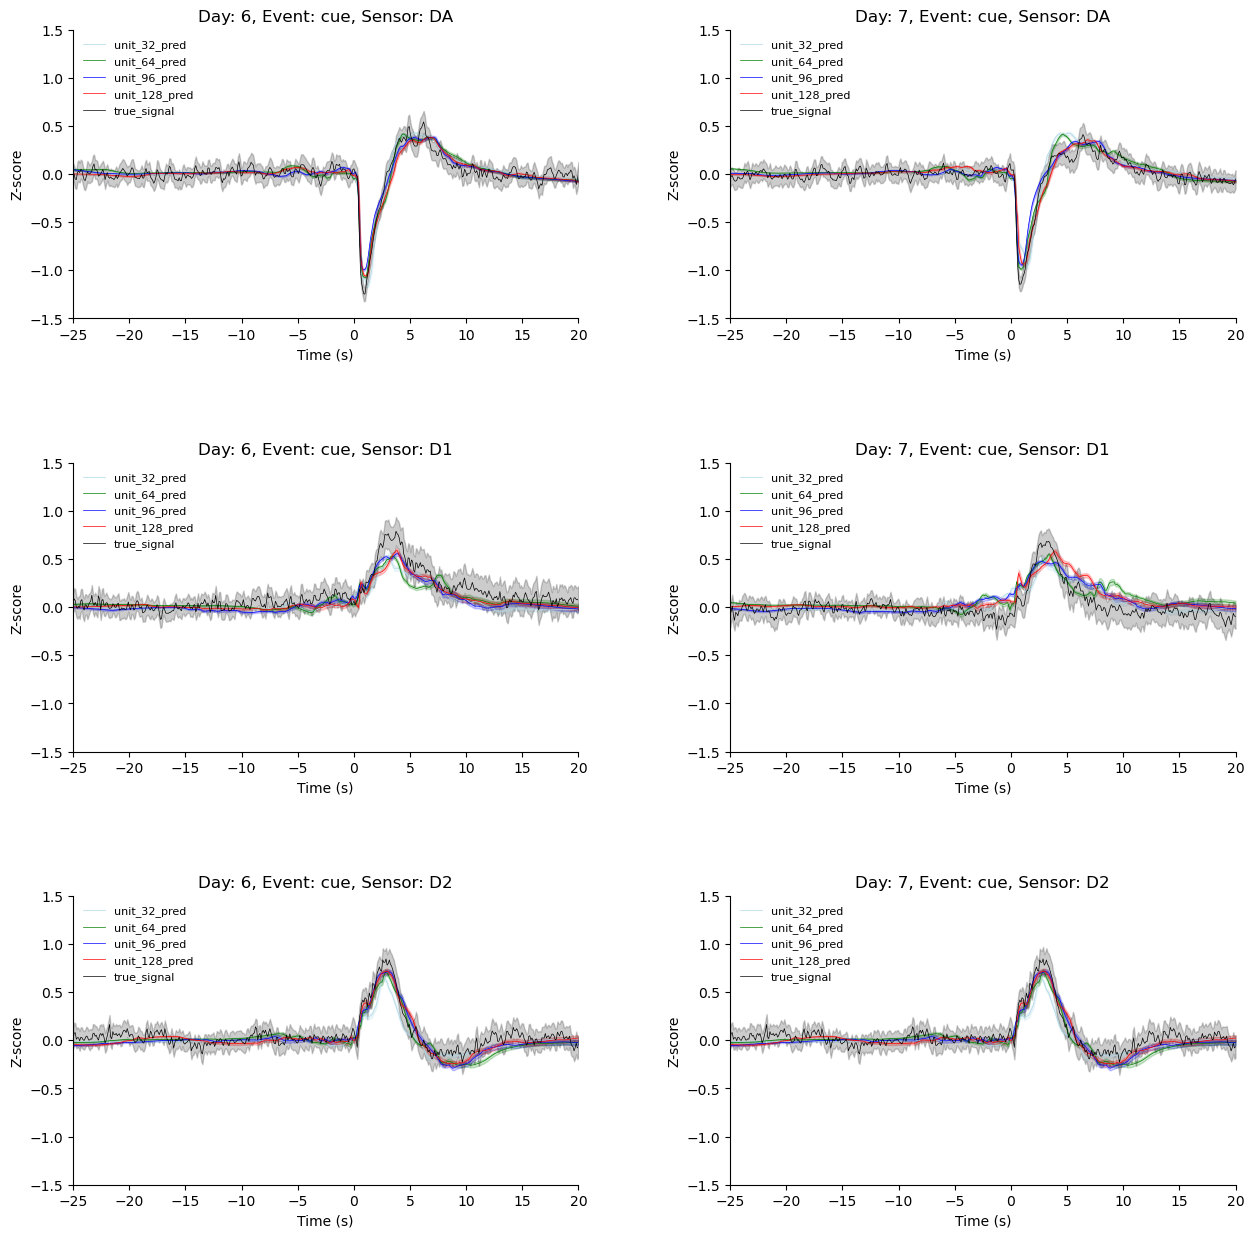

In [16]:
fig = plt.figure(figsize = (15,15))
cols = 2
rows = 3
gs = gridspec.GridSpec(rows, cols)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1], sharey = ax1)
ax3 = fig.add_subplot(gs[1,0], sharey = ax1)
ax4 = fig.add_subplot(gs[1,1], sharey = ax1)
ax5 = fig.add_subplot(gs[2,0], sharey = ax1)
ax6 = fig.add_subplot(gs[2,1], sharey = ax1)

# colors = generate_random_colors(len(signal_cols))
colors = ['lightblue', 'green', 'blue', 'red', 'black']

plot_data(data = day_6_cue_DA_query_result,y_columns = signal_cols,colors = colors, day =  6, event =  'cue', sensor = 'DA', ax = ax1)
plot_data(data = day_7_cue_DA_query_result,y_columns = signal_cols,colors = colors, day =  7, event =  'cue', sensor = 'DA', ax = ax2)
plot_data(data = day_6_d1_query_result,y_columns = signal_cols,colors = colors, day =  6, event = 'cue', sensor = 'D1', ax = ax3)
plot_data(data = day_7_d1_query_result,y_columns = signal_cols,colors = colors, day =  7, event = 'cue', sensor = 'D1', ax = ax4)
plot_data(data = day_6_d2_query_result,y_columns = signal_cols,colors = colors, day =  6, event = 'cue', sensor = 'D2', ax = ax5)
plot_data(data = day_7_d2_query_result,y_columns = signal_cols,colors = colors, day =  7, event = 'cue', sensor = 'D2', ax= ax6)

plt.show()




# Conclusions 
* Number of units does not have an much of an effect, but the addition of the second LSTM layer increased accuracy across all models. 
* 128 Units looks the best, but training time on 96 is lower and not much of a difference in 



# Next steps